In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc
from cnmf import cNMF, Preprocess

import seaborn as sns

np.random.seed(14)

In [2]:
adata = sc.read('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/merged_1.h5ad')
adata

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/p

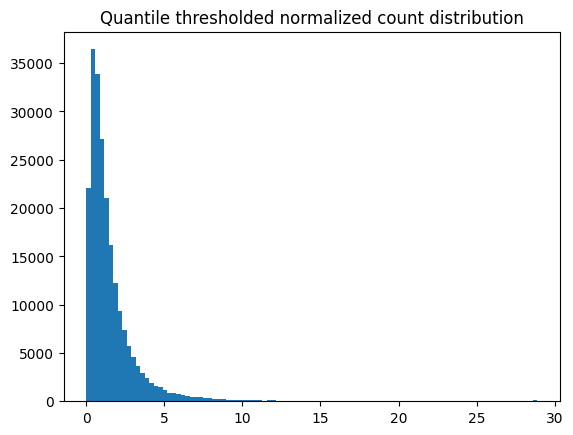

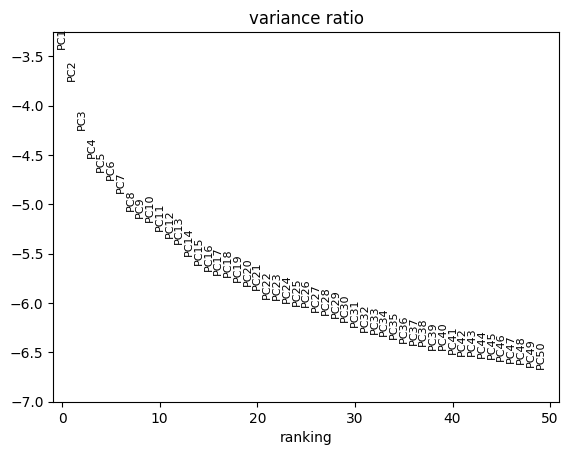

2025-06-03 11:41:48,430 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-06-03 11:42:12,479 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-06-03 11:42:12,890 - harmonypy - INFO - Iteration 1 of 20
2025-06-03 11:42:54,433 - harmonypy - INFO - Iteration 2 of 20
2025-06-03 11:43:36,827 - harmonypy - INFO - Iteration 3 of 20
2025-06-03 11:44:13,288 - harmonypy - INFO - Iteration 4 of 20
2025-06-03 11:44:46,064 - harmonypy - INFO - Iteration 5 of 20
2025-06-03 11:45:17,954 - harmonypy - INFO - Iteration 6 of 20
2025-06-03 11:45:42,390 - harmonypy - INFO - Iteration 7 of 20
2025-06-03 11:46:07,499 - harmonypy - INFO - Converged after 7 iterations


Only considering the two last: ['.Varnorm', '.h5ad'].
Only considering the two last: ['.Varnorm', '.h5ad'].


In [7]:
p = Preprocess(random_seed=14)
(adata_c, adata_tp10k, hvgs) = p.preprocess_for_cnmf(adata, harmony_vars=['Data','Donor'],  n_top_rna_genes = 2000, librarysize_targetsum= 1e6, makeplots=True,
                                                    save_output_base='/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/cNMF_BatchCorrect')

In [8]:
adata_c

AnnData object with n_obs × n_vars = 74312 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_la

In [9]:
hvgs[:5]

['HES4', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'LINC00982']

In [10]:
adata_tp10k

AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [3]:
cnmf_obj_corrected = cNMF(output_dir='/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/cNMF', name='BatchCorrected')
cnmf_obj_corrected.prepare(counts_fn='/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/cNMF/cNMF_BatchCorrect.Corrected.HVG.Varnorm.h5ad',
                           tpm_fn='/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/cNMF/cNMF_BatchCorrect.TP10K.h5ad',
                           genes_file='/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/cNMF/cNMF_BatchCorrect.Corrected.HVGs.txt',
                           components=np.arange(5,12), n_iter=20, seed=14, num_highvar_genes=2000)
cnmf_obj_corrected.factorize(worker_i=0, total_workers=1)
cnmf_obj_corrected.combine()


Only considering the two last: ['.Varnorm', '.h5ad'].
Only considering the two last: ['.Varnorm', '.h5ad'].


/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


[Worker 0]. Starting task 103.
[Worker 0]. Starting task 104.
[Worker 0]. Starting task 105.
[Worker 0]. Starting task 106.


/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


[Worker 0]. Starting task 107.
[Worker 0]. Starting task 108.
[Worker 0]. Starting task 109.
[Worker 0]. Starting task 110.
[Worker 0]. Starting task 111.
[Worker 0]. Starting task 112.
[Worker 0]. Starting task 113.
[Worker 0]. Starting task 114.
[Worker 0]. Starting task 115.


/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


[Worker 0]. Starting task 116.


/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


[Worker 0]. Starting task 117.
[Worker 0]. Starting task 118.
[Worker 0]. Starting task 119.
[Worker 0]. Starting task 120.
[Worker 0]. Starting task 121.
[Worker 0]. Starting task 122.
[Worker 0]. Starting task 123.
[Worker 0]. Starting task 124.
[Worker 0]. Starting task 125.
[Worker 0]. Starting task 126.
[Worker 0]. Starting task 127.
[Worker 0]. Starting task 128.
[Worker 0]. Starting task 129.
[Worker 0]. Starting task 130.
[Worker 0]. Starting task 131.
[Worker 0]. Starting task 132.
[Worker 0]. Starting task 133.
[Worker 0]. Starting task 134.
[Worker 0]. Starting task 135.
[Worker 0]. Starting task 136.
[Worker 0]. Starting task 137.
[Worker 0]. Starting task 138.
[Worker 0]. Starting task 139.
Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.
Combining factorizations for k=8.
Combining factorizations for k=9.
Combining factorizations for k=10.
Combining factorizations for k=11.


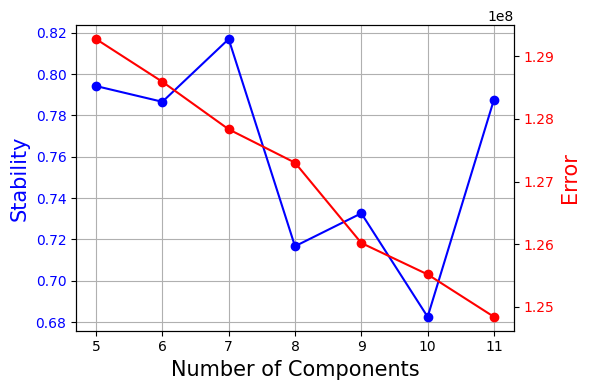

In [4]:
cnmf_obj_corrected.k_selection_plot(close_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


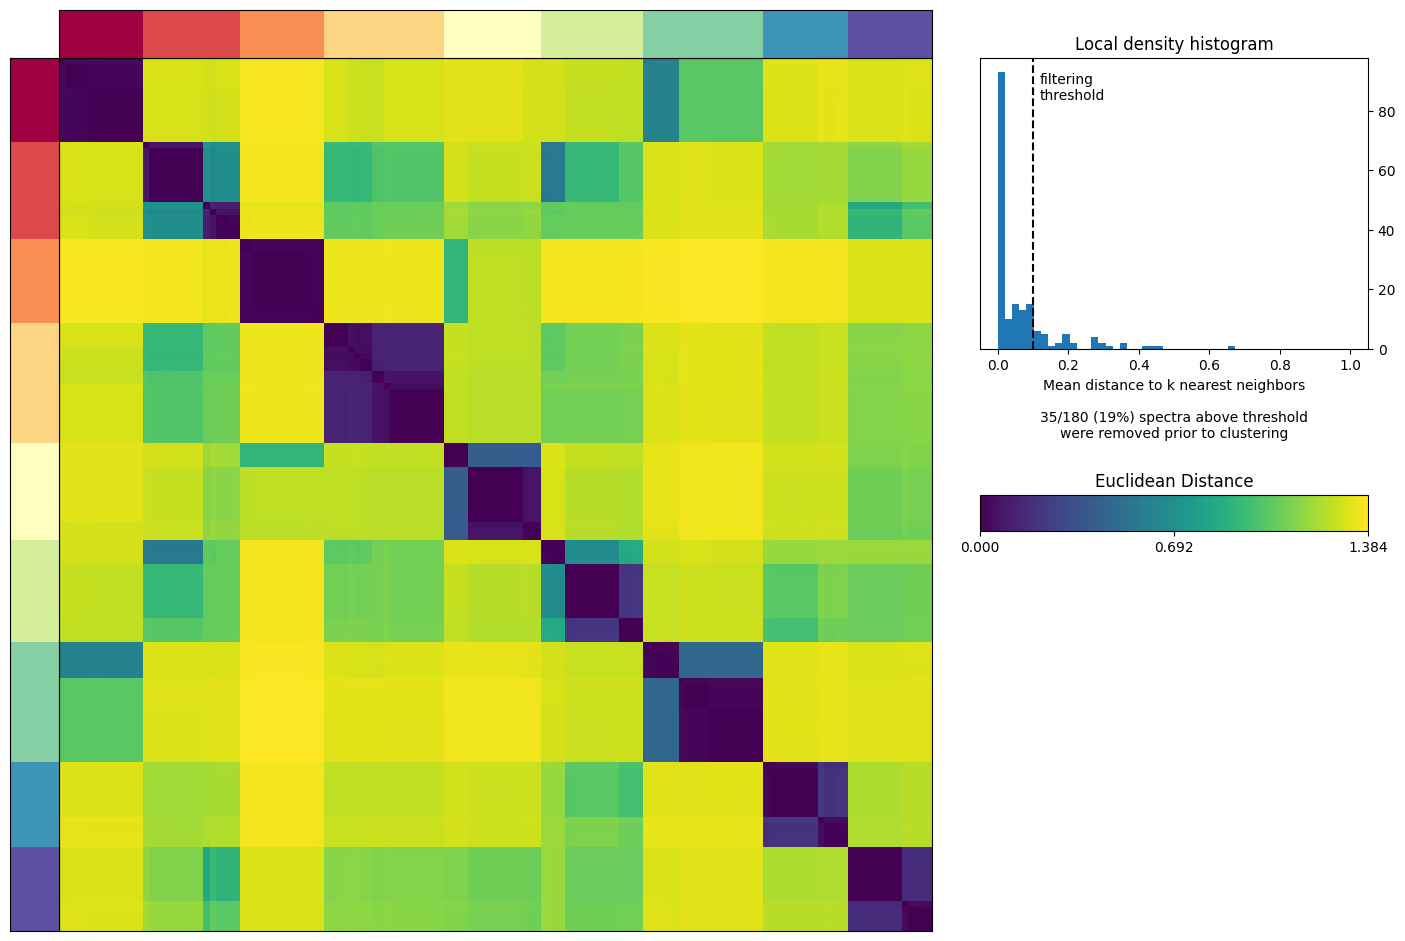

In [5]:
cnmf_obj_corrected.consensus(k=9, density_threshold=0.1, show_clustering=True, close_clustergram_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


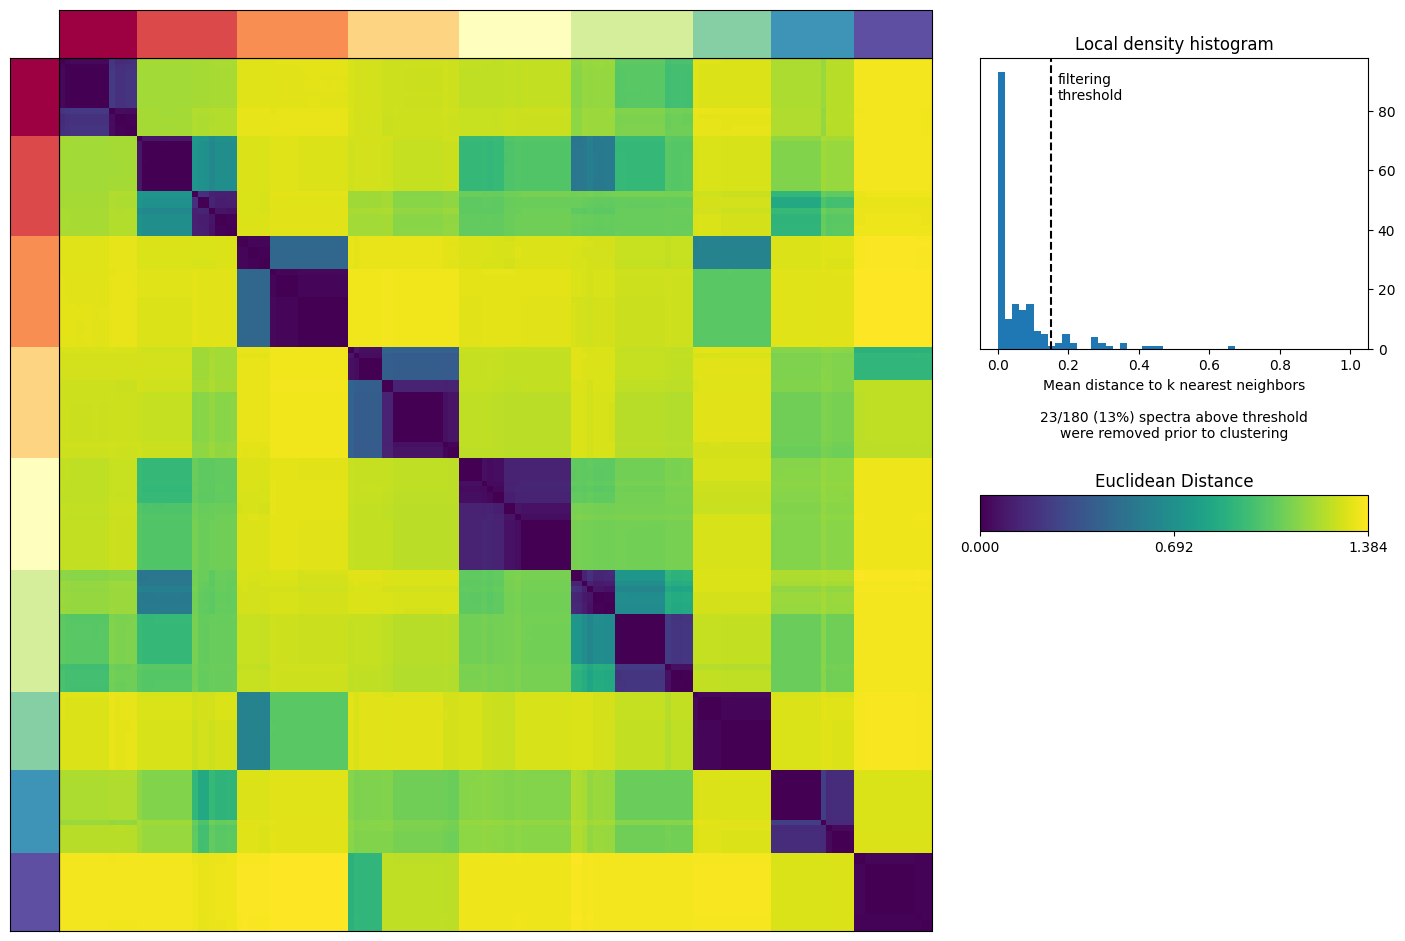

In [6]:
cnmf_obj_corrected.consensus(k=9, density_threshold=0.15, show_clustering=True, close_clustergram_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


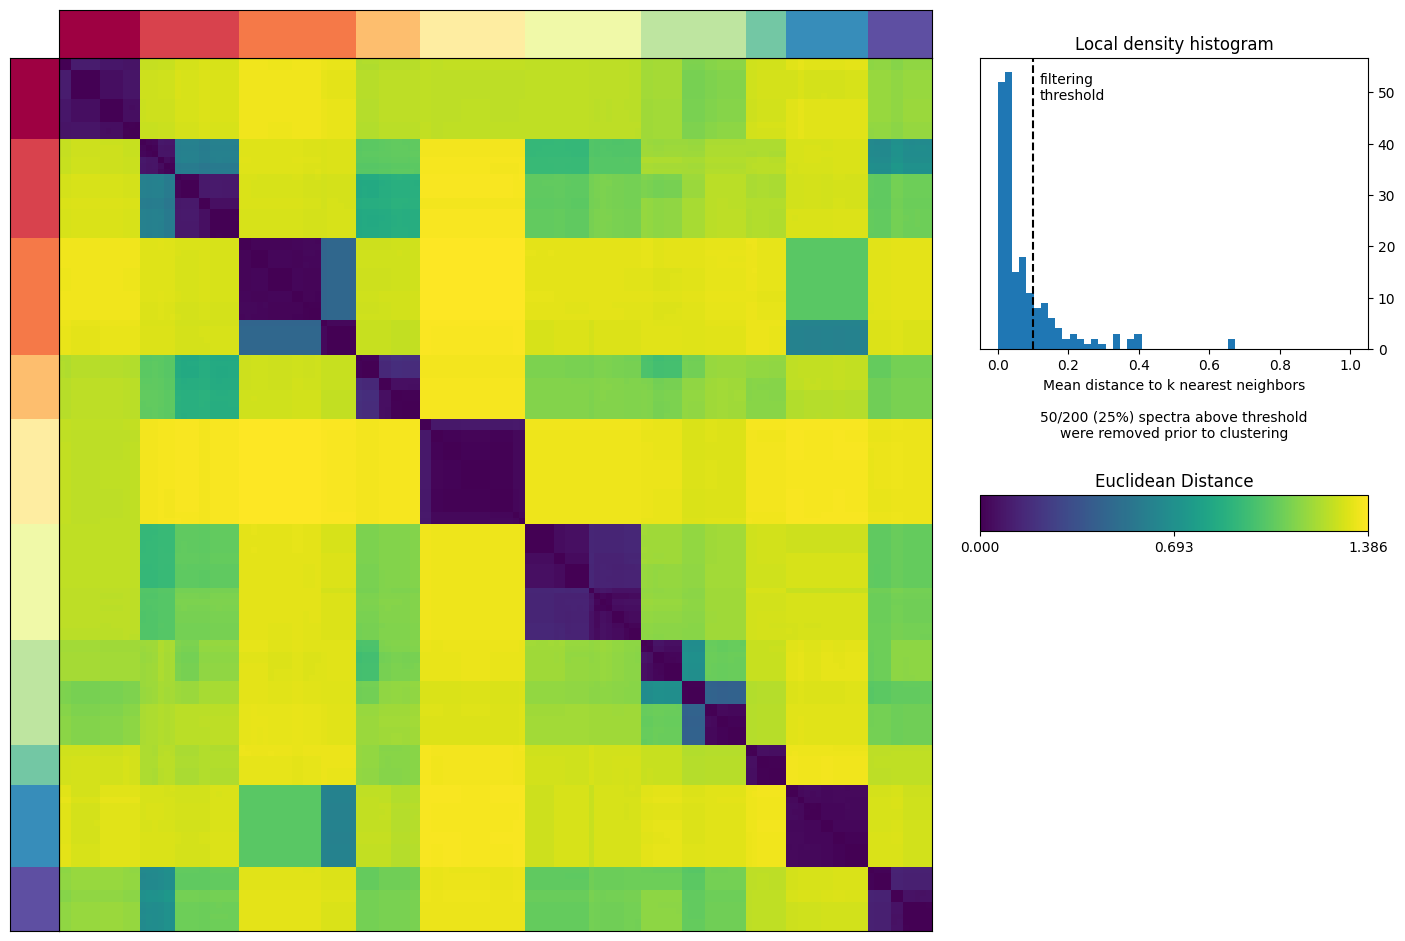

In [7]:
cnmf_obj_corrected.consensus(k=10, density_threshold=0.1, show_clustering=True, close_clustergram_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


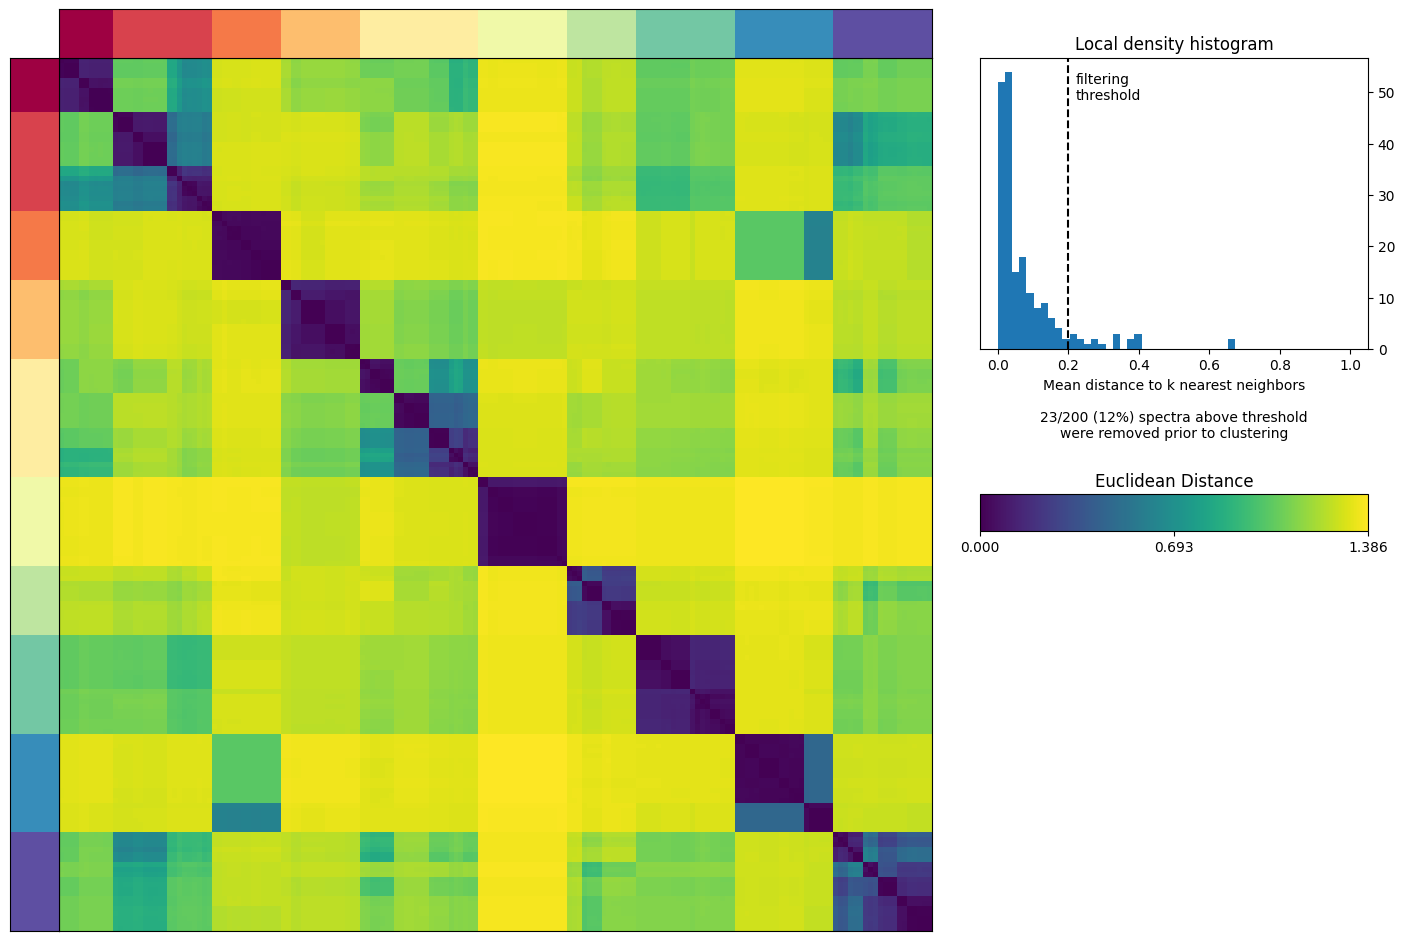

In [8]:
cnmf_obj_corrected.consensus(k=10, density_threshold=0.2, show_clustering=True, close_clustergram_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


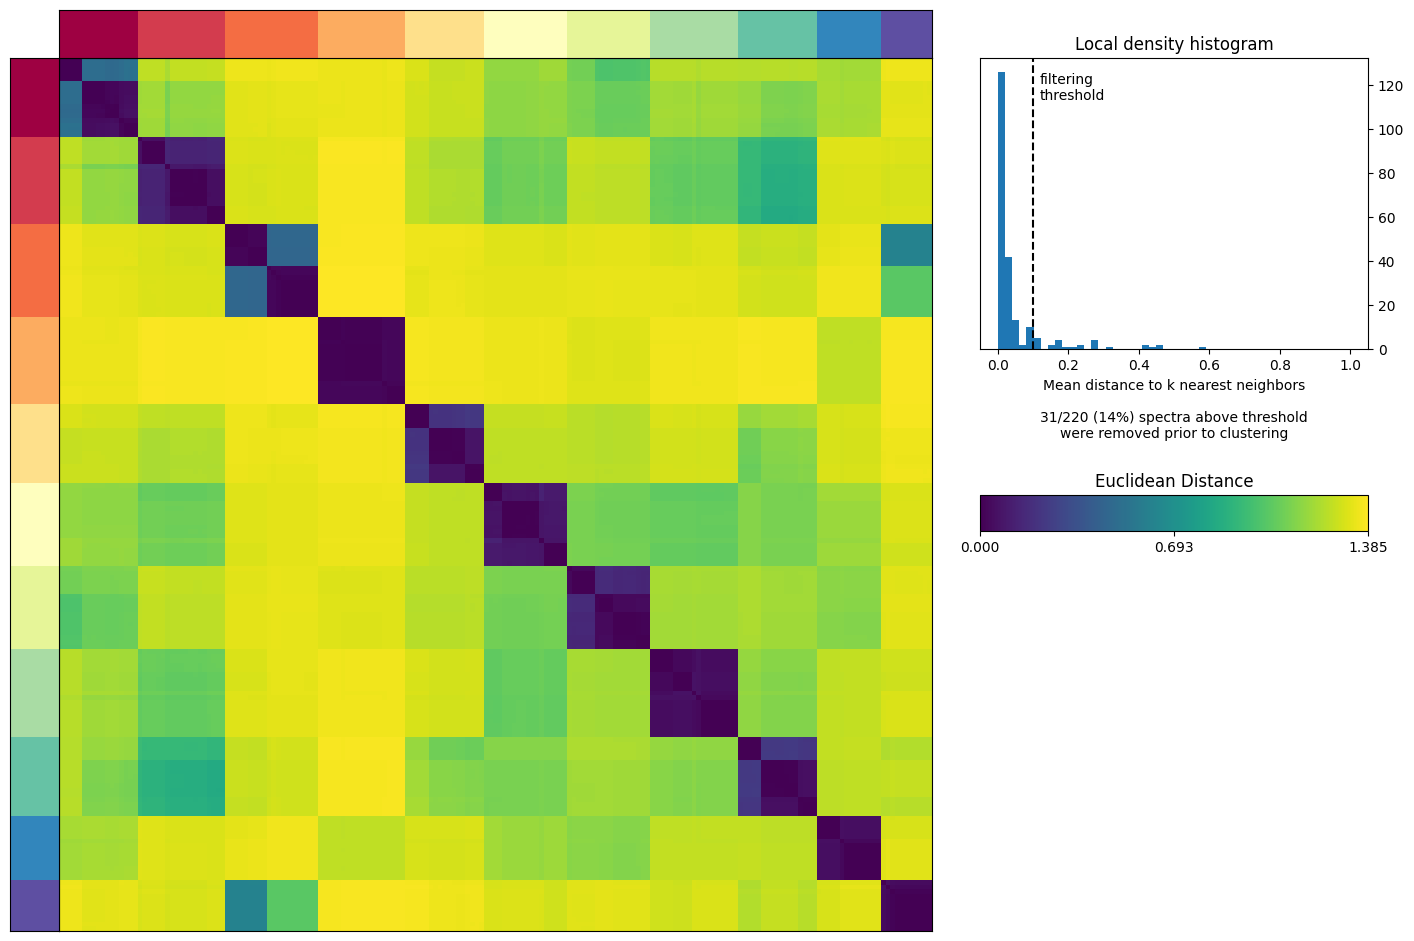

In [9]:
cnmf_obj_corrected.consensus(k=11, density_threshold=0.1, show_clustering=True, close_clustergram_fig=False)

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/package/python-cbrg/current/3.11.11/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


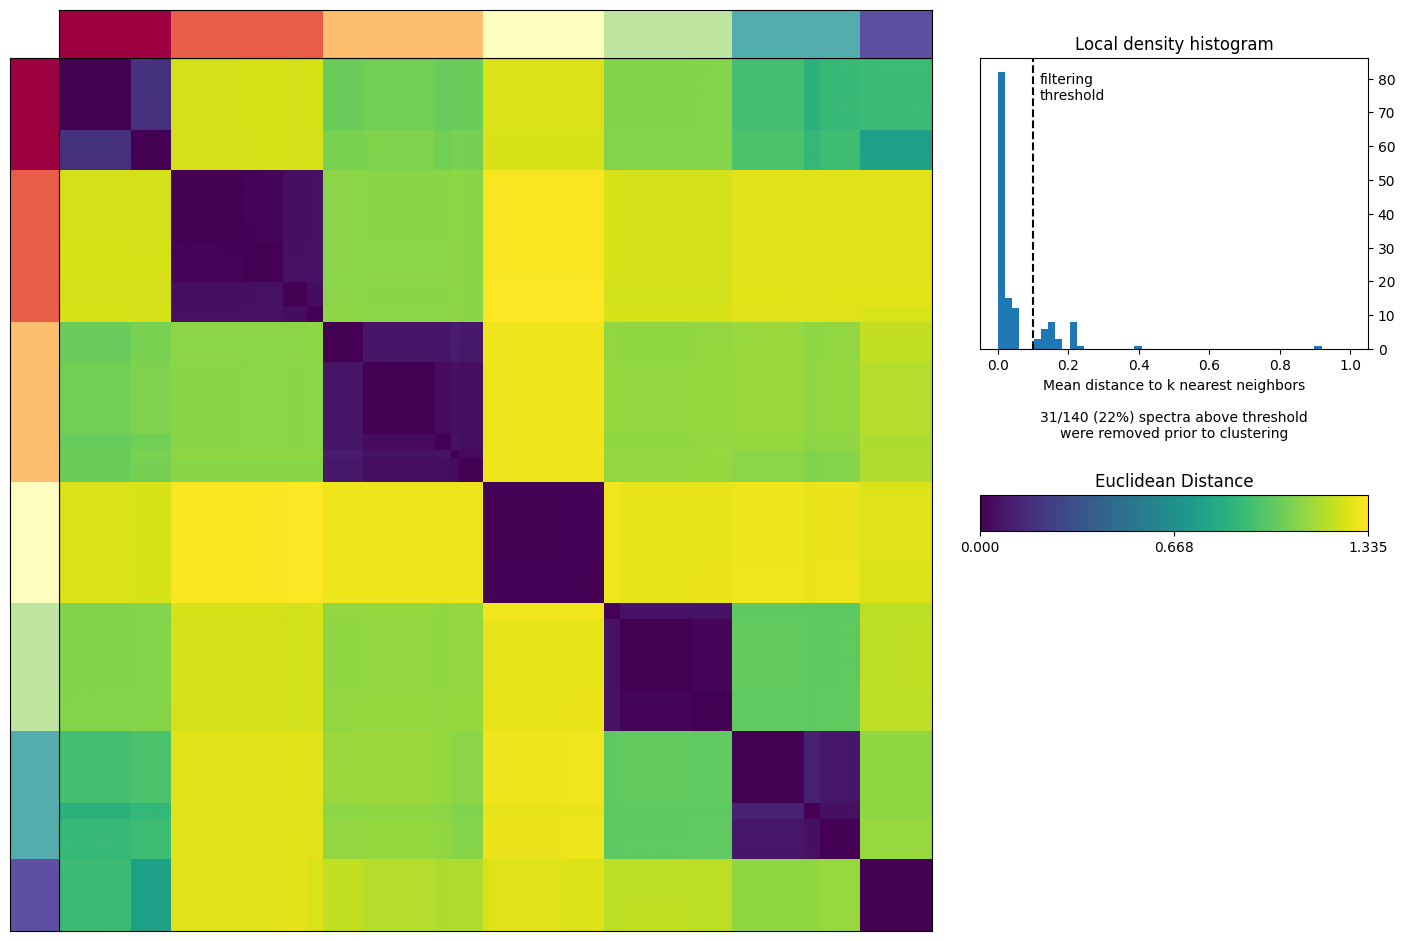

In [10]:
cnmf_obj_corrected.consensus(k=7, density_threshold=0.1, show_clustering=True, close_clustergram_fig=False)